# Traitement et analyse de la liste des musiques avant récupération

## Paquets utilisés

In [419]:
import pandas as pd

## Suppression des doublons

In [420]:
songs: pd.Series

print("Removing duplicated songs...", "\n\n")

with open("./datas/songs.txt", "r", encoding="utf8") as file:
    songs_inputs = file.read().splitlines()
    songs = pd.Series(songs_inputs)

    print("Before", "\n", songs, "\n", "...", "\n\n")
    
    # Remove duplicated songs (keep the first)
    songs.drop_duplicates(inplace=True)

    print("After", "\n", songs, "\n", "...")

    with open("./datas/songs.txt", "w", encoding="utf8") as file:
        file.write("\n".join(songs))
        file.close()

    file.close()

Removing duplicated songs... 


Before 
 0               Médine - Grand Paris
1                    Dabs - Ouloulou
2                     Vald - Bonjour
3        Damso - Ι. Peur d'être père
4       Djadja & Dinaz - Déstabilisé
                    ...             
1221            Falcko - Error 404 D
1222                  Falcko - Capri
1223           Booba - Dernière fois
1224                  Jul - Sakakini
1225              Jul - Ovni présent
Length: 1226, dtype: object 
 ... 


After 
 0               Médine - Grand Paris
1                    Dabs - Ouloulou
2                     Vald - Bonjour
3        Damso - Ι. Peur d'être père
4       Djadja & Dinaz - Déstabilisé
                    ...             
1221            Falcko - Error 404 D
1222                  Falcko - Capri
1223           Booba - Dernière fois
1224                  Jul - Sakakini
1225              Jul - Ovni présent
Length: 1226, dtype: object 
 ...


## Représentation des artistes

In [421]:
df_songs = songs.str.split(" - ", expand=True, n=1)
df_songs.columns=["artist", "song"]

# Group the songs by artists
df_artists_songs = df_songs.groupby("artist")["song"].apply(list).reset_index(name="songs")

df_artists_songs["songs_count"] = df_artists_songs["songs"].apply(lambda x: len(x))

df_artists_songs.sort_values(by="songs_count", inplace=True, ascending=False)

df_artists_songs

,artist,songs,songs_count
22,Booba,"[Drapeau noir, Friday, JAUNÉ, PGP, Izi Monnaie...",54
149,Ninho,"[Rose, Lové (feat. Gradur), Pourquoi, Elle m'a...",46
123,Lim,"[C'est ça gars, Je rap, Enfant du ghetto, Mes ...",44
112,La Fouine,"[Mohamed Salah - Bonus rap, Millions, Wesh wes...",37
90,Jul,"[Marseille - Paris, Ça sent bon, J'suis pas pa...",36
...,...,...,...
46,Diaz,[Limpide],1
130,MHD,[Afro Trap Pt. 7 (La puissance)],1
129,M Le Maudit,[Arte Gang],1
126,Luidji,[Pour deux âmes solitaires (Part. 1)],1


<AxesSubplot:xlabel='artist'>

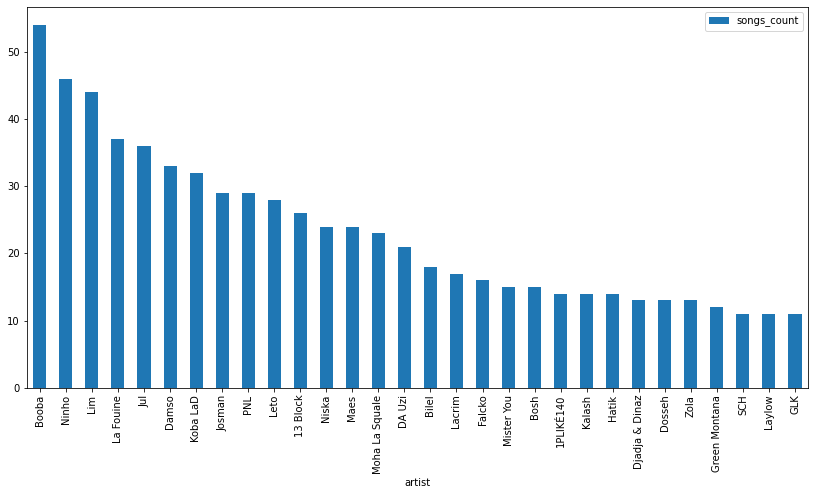

In [422]:
df_artists_songs[:50].plot(kind="bar", x="artist", y="songs_count", figsize=(14, 7))